In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import stdev
import os
import lvm_read
from datetime import datetime


In [2]:

Day = "25"
Month_year = "July23"

# Folder path
folder_path = r"G:\Shared drives\EGR-MNE-FAST Research Group-ExperimentalData\Projects\additive_manufacturing\projects\thermal_conductivity\Data\Ethans Data\25July2023_ThermalConductivity_StainlessSteel_NonChanneled"

# List xlsx files in the folder
xlsx_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".xlsx")]
xlsx_files.sort()
# Lists to store averages
TC_Group_1_AVG = []
TC_Group_2_AVG = []
TC_Group_3_AVG = []
Time_Group = []

for file_path in xlsx_files:
    try:
        xlsx_data = pd.read_excel(file_path)
        df = pd.DataFrame(xlsx_data)

        # TC1-4
        TC_1_4 = ["TC1", "TC2", "TC3", "TC4"]
        TC_1_4_AVG = df[TC_1_4].mean().mean().round(3)
        TC_Group_1_AVG.append(TC_1_4_AVG)

        # TC5-8
        TC_5_8 = ["TC5", "TC6", "TC7", "TC8"]
        TC_5_8_AVG = df[TC_5_8].mean().mean().round(3)
        TC_Group_2_AVG.append(TC_5_8_AVG)

        # TC10-13
        TC_10_13 = ["TC10", "TC11", "TC12", "TC13"]
        TC_10_13_AVG = df[TC_10_13].mean().mean().round(3)
        TC_Group_3_AVG.append(TC_10_13_AVG)

        # Time
        time_str = df['Time'].iloc[0].strftime('%H:%M:%S.%f')[:-3]
        dummy_date_str = '1970-01-01'
        time_obj = datetime.strptime(time_str, '%H:%M:%S.%f')
        total_seconds = (time_obj.hour * 3600) + (time_obj.minute * 60) + time_obj.second + (time_obj.microsecond / 1000000)
        total_hours = total_seconds/3600



        Time_Group.append(total_hours)

    except Exception as e:
        print(f"Error processing file: {file_path}, Error: {e}")
#adjusting time scale
First = Time_Group[0]
Time_From_0 = [round(x - First, 2) for x in Time_Group]

# Create DataFrame
data = {
    "Time": Time_From_0,
    "G1TAverage": TC_Group_1_AVG,
    "G2TAverage": TC_Group_2_AVG,
    "G3TAverage": TC_Group_3_AVG
}
T_avg_chart = pd.DataFrame(data)
T_avg_chart


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'G:\\Shared drives\\EGR-MNE-FAST Research Group-ExperimentalData\\Projects\\additive_manufacturing\\projects\\thermal_conductivity\\Data\\Ethans Data\\25July2023_ThermalConductivity_StainlessSteel_NonChanneled'

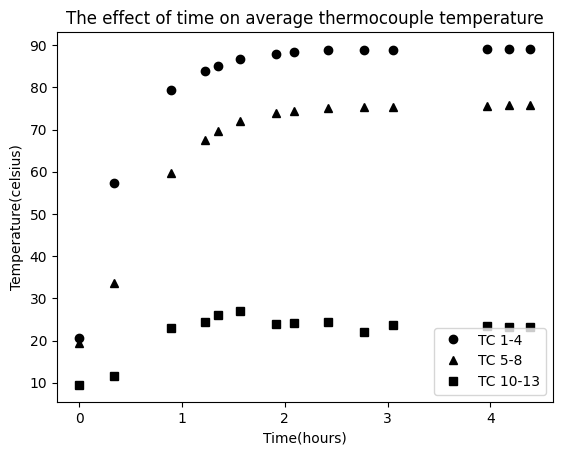

In [ ]:
#varialable setup
y1 = T_avg_chart['G1TAverage']
y2 = T_avg_chart['G2TAverage']
y3 = T_avg_chart['G3TAverage']
#graph setup
plt.plot(Time_From_0,y1,'o',label="TC 1-4", color=("black"))
plt.plot(Time_From_0,y2,'^',label="TC 5-8",color=("black"))
plt.plot(Time_From_0,y3,'s',label="TC 10-13",color=("black"))
plt.xlabel('Time(hours)')
plt.ylabel("Temperature(celsius)")
plt.title("The effect of time on average thermocouple temperature")
plt.legend()
T_vs_time = plt.gca()

In [ ]:
SD_1_T = []
SD_2_T = []
SD_3_T = []

for file in xlsx_files:
    TC_AVG_1_4 = []
    TC_AVG_5_8 = []
    TC_AVG_10_13 = []
    df = pd.read_excel(file)

    for i in range(1, 5):
        TC = df[f"TC{i}"].mean()
        TC_AVG_1_4.append(TC)

    for i in range(5, 9):
        TC = df[f"TC{i}"].mean()
        TC_AVG_5_8.append(TC)

    for i in range(10, 14):
        TC = df[f"TC{i}"].mean()
        TC_AVG_10_13.append(TC)

    SD_1_T.append(np.std(TC_AVG_1_4))
    SD_2_T.append(np.std(TC_AVG_5_8))
    SD_3_T.append(np.std(TC_AVG_10_13))

data = {
    "Time": Time_From_0,
    "G1Average": SD_1_T,
    "G2Average": SD_2_T,
    "G3Average": SD_3_T
}
Standard_deviation = pd.DataFrame(data)
Standard_deviation


,Time,G1Average,G2Average,G3Average
0,0.00,0.129240,0.384898,0.624307
1,0.34,3.041075,0.594567,0.719952
2,0.89,1.432798,0.741248,2.110601
3,1.22,1.077333,0.693543,3.011453
4,1.35,1.013798,0.754324,3.004653
5,1.56,0.941483,0.848360,3.034540
6,1.91,0.839187,1.377435,3.279115
7,2.09,0.813146,1.425960,3.273476
8,2.42,0.784519,1.438357,3.444447
9,2.77,0.793510,1.458251,3.744982


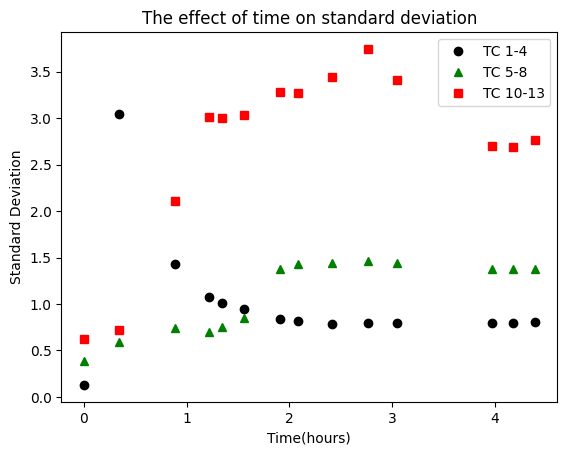

In [ ]:
#varialable setup
y1 = Standard_deviation['G1Average']
y2 = Standard_deviation['G2Average']
y3 = Standard_deviation['G3Average']
#graph setup
plt.plot(Time_From_0,y1,'o',label="TC 1-4", color=("black"))
plt.plot(Time_From_0,y2,'^',label="TC 5-8",color=("green"))
plt.plot(Time_From_0,y3,'s',label="TC 10-13",color=("red"))
plt.xlabel('Time(hours)')
plt.ylabel("Standard Deviation")
plt.title("The effect of time on standard deviation")
plt.legend()
SD_vs_time = plt.gca()

In [ ]:
DT_SS_tot = []
DT_PG_tot = []
K = []

for i in range(len(T_avg_chart)):
    DT_1 = T_avg_chart.at[i, "G1TAverage"] - T_avg_chart.at[i, "G2TAverage"]
    DT_2 = T_avg_chart.at[i, "G2TAverage"] - T_avg_chart.at[i, "G3TAverage"]
    stuff = ((DT_2 / 0.01206) * (0.01609 / DT_1)) * 0.18
    K.append(round(stuff, 3))

data = {
    "Time": Time_From_0,
    "Thermal Conductivity": K
}
Thermal_conductivity = pd.DataFrame(data)
Thermal_conductivity


,Time,Thermal Conductivity
0,0.00,2.001
1,0.34,0.225
2,0.89,0.459
3,1.22,0.643
4,1.35,0.684
5,1.56,0.761
6,1.91,0.859
7,2.09,0.875
8,2.42,0.904
9,2.77,0.963


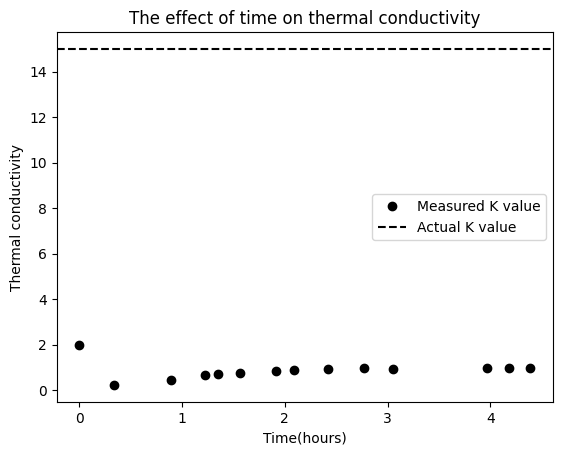

In [ ]:
#varialable setup
y1 = Thermal_conductivity['Thermal Conductivity']
y2 = 15

#graph setup
plt.plot(Time_From_0,y1,'o',label="Measured K value", color=("black"))
#plt.plot(Time_From_0,y2, "-", label="Actual K value", color=("black"))
plt.axhline(y = 15, color = 'black', linestyle = '--', label="Actual K value")
plt.xlabel('Time(hours)')
plt.ylabel("Thermal conductivity")
plt.title("The effect of time on thermal conductivity")
plt.legend()
K_vs_time = plt.gca()

In [ ]:
save = False
list_1 = ["_average_temperature","_standard_deviation","_thermal_conductivity"]
mist = [T_avg_chart,Standard_deviation,Thermal_conductivity]


if save == True:
    Charts_folder_path = r"G:\\Shared drives\\EGR-MNE-FAST Research Group-ExperimentalData\\Projects\\additive_manufacturing\\projects\\thermal_conductivity\\Data\\Ethans Data\\Charts\\"+Day+ Month_year
    os.makedirs(Charts_folder_path)
    x = 0
    for i in list_1:
            
            var = mist[x]
            
            save_folder = fr"G:\\Shared drives\\EGR-MNE-FAST Research Group-ExperimentalData\\Projects\\additive_manufacturing\\projects\\thermal_conductivity\\Data\\Ethans Data\\Charts\\"+Day+ Month_year+"\\"+Day+ Month_year+f"{i}.csv"
            var.to_csv(save_folder, index=False, header=True)
            save_folder = fr"G:\\Shared drives\\EGR-MNE-FAST Research Group-ExperimentalData\\Projects\\additive_manufacturing\\projects\\thermal_conductivity\\Data\\Ethans Data\\Charts\\"+Day+ Month_year+"\\"+Day+ Month_year+f"{i}.xlsx"
            var.to_excel(save_folder, index=False, header=True)
            x +=1


list_2 = ["_average_temperature_vs_time","_standard_deviation_vs_time","_thermal_conductivity_vs_time"]
bist = [T_vs_time,SD_vs_time,K_vs_time]

if save == True:
    Graphs_folder_path = r"G:\\Shared drives\\EGR-MNE-FAST Research Group-ExperimentalData\\Projects\\additive_manufacturing\\projects\\thermal_conductivity\Data\\Ethans Data\\Graphs\\"+Day+ Month_year
    os.makedirs(Graphs_folder_path)
    x = 0 
    for i in list_2:
            var = bist[x]
            save_folder = fr"G:\\Shared drives\\EGR-MNE-FAST Research Group-ExperimentalData\\Projects\\additive_manufacturing\\projects\\thermal_conductivity\\Data\\Ethans Data\\Graphs\\"+Day+ Month_year+"\\"+Day+ Month_year+f"{i}.png"
            var.figure.savefig(save_folder, format='pdf')
            x += 1